In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data  # The features
y = iris.target
print(iris.data, iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The features
y = iris.target  # The target variable (species)

# 2. Conduct the pre-processing steps (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Remove the target variable
# (not needed here since we're using X directly for clustering)

# 4. Plot the datapoints using scatter plots (2D projection using PCA for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Iris Dataset (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.clim(-0.5, 2.5)
plt.show()

# 5. Apply Fuzzy C-means clustering
n_clusters = 3  # Assuming we know there are 3 species
n_samples, n_features = X_scaled.shape

# Initialize the fuzzy c-means clustering
centers = np.random.rand(n_clusters, n_features)
U, U0 = None, None

# Fuzzy C-means algorithm
maxiter = 300
for iter in range(maxiter):
    # Step 1: Calculate distance
    distances = np.zeros((n_clusters, n_samples))
    for j in range(n_clusters):
        distances[j] = np.linalg.norm(X_scaled -  centers[j], axis=1)

    # Step 2: Update membership values
    U = 1 / (distances ** 2)
    U = U / np.sum(U, axis=0)

    # Step 3: Update centers
    for j in range(n_clusters):
        centers[j] = np.dot(U[j] ** 2, X_scaled) / np.sum(U[j] ** 2)

# Assign clusters
cluster_labels = np.argmax(U, axis=0)

# 6. Print and plot the cluster centroids and cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Fuzzy C-Means Clustering (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
# 8. Measure performance using partition coefficient and classification entropy
def partition_coefficient(U):
    return np.sum(U ** 2) / U.shape[1]

def classification_entropy(U):
    return -np.sum(U * np.log(U + 1e-10)) / U.shape[1]

pc = partition_coefficient(U)
ce = classification_entropy(U)

print(f'Partition Coefficient: {pc:.4f}')
print(f'Classification Entropy: {ce:.4f}')



ModuleNotFoundError: No module named 'skfuzzy'

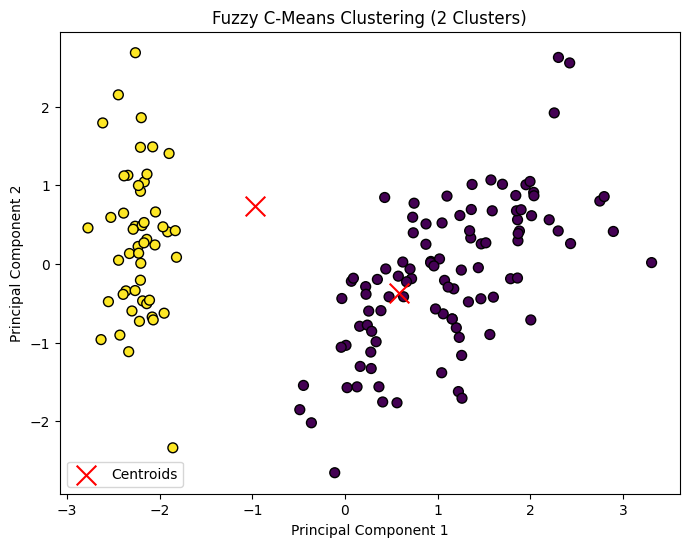

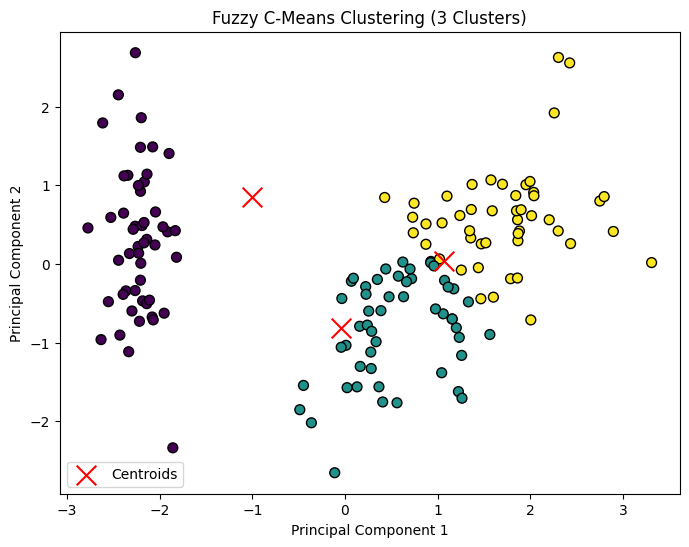

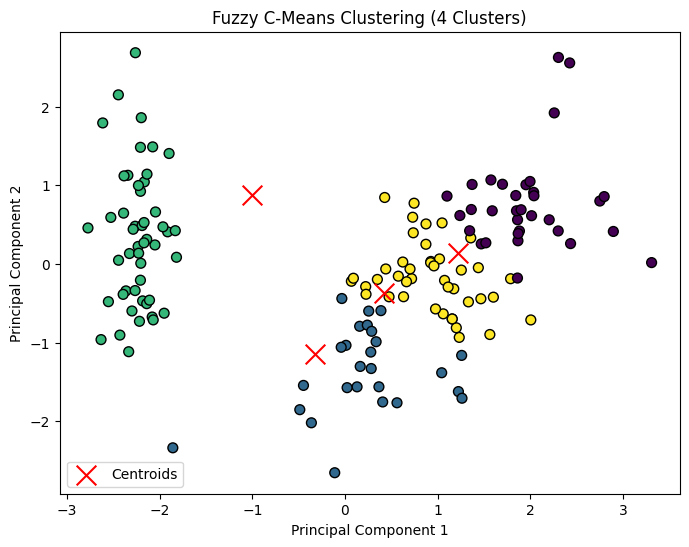

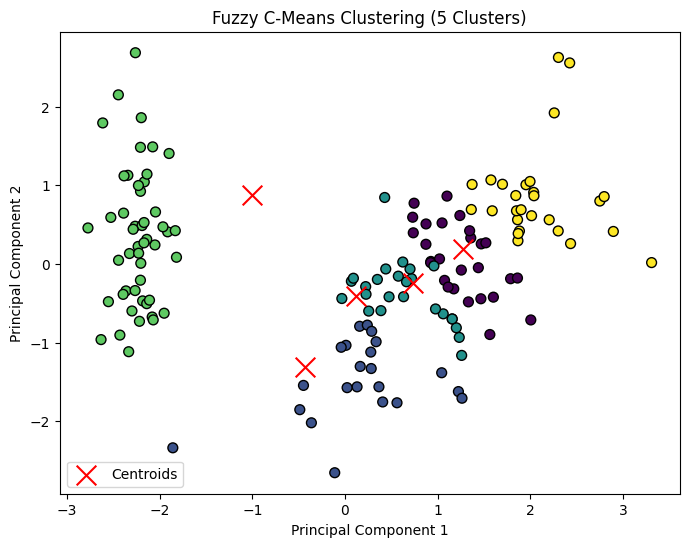

Partition Coefficient: 0.5388
Classification Entropy: 0.9177


In [ ]:
# 7. Repeat the algorithm for 'n' number of clusters (e.g., from 2 to 5)
for n_clusters in range(2, 6):
    centers = np.random.rand(n_clusters, n_features)
    U = None

    # Fuzzy C-means algorithm
    for iter in range(maxiter):
        distances = np.zeros((n_clusters, n_samples))
        for j in range(n_clusters):
            distances[j] = np.linalg.norm(X_scaled - centers[j], axis=1)

        U = 1 / (distances ** 2)
        U = U / np.sum(U, axis=0)

        for j in range(n_clusters):
            centers[j] = np.dot(U[j] ** 2, X_scaled) / np.sum(U[j] ** 2)

    cluster_labels = np.argmax(U, axis=0)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'Fuzzy C-Means Clustering ({n_clusters} Clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# 8. Measure performance using partition coefficient and classification entropy
def partition_coefficient(U):
    return np.sum(U ** 2) / U.shape[1]

def classification_entropy(U):
    return -np.sum(U * np.log(U + 1e-10)) / U.shape[1]

pc = partition_coefficient(U)
ce = classification_entropy(U)

print(f'Partition Coefficient: {pc:.4f}')
print(f'Classification Entropy: {ce:.4f}')